In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert1/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert1/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert1/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

1860

In [10]:
df_train

,labels
0,3
1,2
2,5
3,1
4,4
...,...
1855,1
1856,5
1857,4
1858,5


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,9.868231e-01,0.003875,0.000017,0.008416,0.000144,0.000724,9.999965e-01,3.050597e-08,4.180201e-11,3.544984e-08,2.818289e-06,6.458926e-07
1,4.480442e-05,0.002354,0.000122,0.969830,0.001741,0.025908,3.293480e-12,5.757380e-10,2.715425e-11,9.999076e-01,5.853965e-08,9.237029e-05
2,3.244231e-07,0.000087,0.999900,0.000006,0.000001,0.000006,9.133354e-08,5.190801e-09,9.998800e-01,1.377784e-06,1.065082e-07,1.183443e-04
3,7.267597e-05,0.000142,0.000079,0.107955,0.000029,0.891723,1.149370e-02,2.589215e-03,4.142054e-03,1.571160e-01,7.270838e-02,7.519507e-01
4,5.066096e-04,0.001949,0.000253,0.029472,0.000321,0.967497,4.259465e-07,8.716989e-01,6.219706e-05,1.255680e-01,4.994594e-06,2.665530e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
202,5.786679e-05,0.000258,0.000029,0.000694,0.004409,0.994552,6.368382e-08,5.830236e-09,2.907437e-04,8.280055e-05,1.148807e-01,8.847458e-01
203,1.949344e-07,0.000052,0.999928,0.000009,0.000001,0.000009,1.124625e-10,3.719832e-09,9.997450e-01,8.501186e-08,2.549505e-04,1.208748e-08
204,1.627866e-03,0.004693,0.000329,0.004044,0.831949,0.157358,3.668804e-04,1.806214e-04,5.962101e-03,5.036101e-04,9.764073e-01,1.657945e-02
205,4.316892e-05,0.000232,0.000092,0.003479,0.823165,0.172989,3.250004e-10,1.842577e-07,2.729654e-06,3.829209e-09,9.979839e-01,2.013060e-03


In [13]:
len(x_test),len(x_train)

(207, 1860)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,3.139591e-05,0.000790,0.000003,0.998874,0.000018,0.000285,3.410993e-03,1.404161e-03,9.909497e-03,9.851754e-01,7.988319e-05,2.002994e-05
1,1.103409e-07,0.000032,0.999933,0.000022,0.000001,0.000011,6.686086e-04,2.965975e-03,9.898452e-01,2.173457e-04,6.625170e-04,5.640339e-03
2,7.565987e-03,0.003240,0.000197,0.093270,0.000536,0.895191,5.751084e-08,7.459536e-12,2.568105e-10,2.021580e-03,3.049719e-03,9.949287e-01
3,9.221826e-04,0.972584,0.026023,0.000381,0.000035,0.000054,2.498322e-05,9.993660e-01,1.106080e-05,5.972445e-04,3.921983e-07,3.156232e-07
4,1.234611e-04,0.000554,0.000002,0.003309,0.995933,0.000079,2.063275e-11,2.146545e-13,4.067878e-08,8.096257e-11,9.999998e-01,1.803801e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,2.386935e-03,0.992171,0.004256,0.001075,0.000007,0.000105,8.896496e-15,1.000000e+00,4.577453e-08,2.132386e-12,1.478108e-14,5.662018e-14
1856,9.088054e-02,0.003614,0.000219,0.675536,0.000492,0.229259,5.969245e-04,2.960561e-05,3.139907e-02,1.014604e-03,9.549186e-03,9.574106e-01
1857,6.606330e-06,0.000776,0.000345,0.000146,0.992820,0.005906,2.316331e-12,3.484239e-10,1.809272e-05,2.846565e-09,9.999714e-01,1.052558e-05
1858,9.965926e-05,0.000174,0.000029,0.001711,0.000860,0.997127,1.994670e-05,2.559846e-07,1.859176e-09,2.191871e-04,2.378259e-05,9.997367e-01


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

1860

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([3, 2, 5, ..., 4, 5, 4]), (1860,))

# training machine learning

In [19]:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

clf = MLPClassifier(hidden_layer_sizes=(40,),random_state=42, max_iter=500).fit(new_x_train, new_y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [20]:
predictions

array([0, 3, 2, 5, 5, 2, 5, 1, 4, 0, 3, 1, 4, 0, 4, 3, 4, 1, 1, 1, 5, 2,
       1, 2, 1, 5, 3, 5, 5, 5, 5, 4, 5, 5, 2, 2, 4, 1, 5, 4, 2, 2, 1, 5,
       2, 1, 5, 5, 4, 3, 4, 2, 1, 3, 3, 0, 0, 0, 2, 4, 4, 4, 5, 0, 1, 3,
       1, 0, 5, 1, 4, 2, 5, 3, 5, 4, 0, 3, 4, 4, 3, 4, 4, 0, 0, 1, 2, 3,
       3, 5, 5, 1, 0, 1, 5, 5, 1, 2, 5, 3, 4, 3, 3, 0, 4, 5, 2, 1, 4, 1,
       5, 2, 0, 1, 4, 0, 4, 1, 1, 1, 1, 5, 1, 4, 1, 2, 3, 2, 5, 1, 2, 0,
       1, 5, 1, 0, 5, 0, 1, 1, 2, 1, 2, 5, 1, 2, 3, 0, 0, 3, 2, 3, 5, 0,
       1, 2, 1, 3, 0, 0, 1, 3, 3, 2, 4, 1, 0, 0, 5, 4, 4, 3, 1, 4, 3, 1,
       5, 0, 4, 4, 4, 0, 0, 5, 3, 3, 1, 3, 3, 4, 1, 4, 1, 1, 4, 2, 3, 1,
       4, 5, 3, 2, 5, 2, 4, 4, 1])

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.93      0.98      0.96        44
           2       1.00      0.93      0.97        30
           3       0.97      0.88      0.92        34
           4       0.92      1.00      0.96        34
           5       0.92      0.89      0.91        38

    accuracy                           0.94       207
   macro avg       0.94      0.94      0.94       207
weighted avg       0.94      0.94      0.94       207

----accuracy score 93.71980676328504 ----


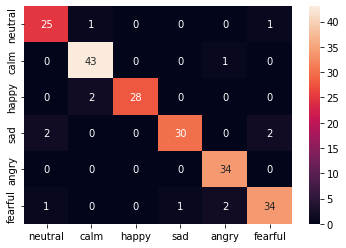

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [22]:
path='/content/drive/My Drive/fusion/fusion_model/MLP/expert1'
savedvX = joblib.dump(clf, path)

print("MODEL SAVED")

MODEL SAVED
